**Исследование объявлений о продаже квартир**

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 



**Задача:**
Установить параметры, определяющие рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему, отслеживающую аномалии и мошенническую деятельность.

**Ход работы:**

- [1. Обзор данных](#Обзор_данных)
- [2. Предобработка данных:](#Предобработка_данных)
  - [приведем типы данных к нужному формату;](#тип)
  - [обработаем пропуски;](#пропуски)
  - [добавим новые столбцы;](#столбцы)
- [3. Исследовательский анализ данных:](#анализ)
  - [посмотрим распределение параметров;](#распределение)
  - [посмотрим когда чаще всего покупают квартиры;](#покупают)
  - [посмотрим как быстро продавались квартиры;](#продавались)
  - [посмотрим факторы влияющие на стоимость объекта;](#факторы)
  - [найдем среднию цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений;](#Найдем)
  - [посмотрим влияние расстояния до центра горада на стоимость квартиры;](#расстояния)
- [4. Общий вывод:](#Общий_вывод)  

**Описание данных:**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


<a name="Обзор_данных"></a>

# 1. Обзор данных

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')


In [2]:
for i in [data]:
    print('Дубликатов:' , i.duplicated().sum())
    display(i.head())
    display(i.info())
    display(i.isna().sum())

Дубликатов: 0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<a name="Предобработка_данных"></a>
# 2. Предобработка данных



<a name="тип"></a>
**Приведем типы данных к нужному формату**


Переводим столбец с датами в формат datetime без времени, т.к. время в исследовании не понадобится.

In [3]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format ='%Y-%m-%d')

В колонке с ценами меняем тип данных на int

In [4]:
data['last_price'] = data['last_price'].astype('int64')

Можем предположить, если в обьявление не указано, что квартира "апартаменты", то она ей не является. Тип данных меняем на bool

In [5]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Ситуация аналогичена апартаментам, заменим пропуски на 0 и изменим тип данных на int

In [6]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

Заменяем пропущенные значения на 0, меняем тип данных на int

In [7]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int64')

Заменяем пропущенные значения на 0, меняем тип данных на int

In [8]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int64')

In [9]:
data.loc[~data['days_exposition'].isna(), 'days_exposition'] = data.loc[~data['days_exposition'].isna(), 'days_exposition'].astype('int64')


<a name="пропуски"></a>
**Обработаем пропуски**

Кол-во строк с пропуском в floors_total - 86, т.к. это не отразится на корректности полученных данных по результату 
исследования - удаляем + заменяем тип данных на int

In [10]:
data = data.dropna(subset=['floors_total', 'locality_name']).reset_index(drop=True)

data['floors_total'] = data['floors_total'].astype('int64')

Заполним пропуски в 'ceiling_height' медианой по домам одинаковой этажности.

In [11]:
for index in data['floors_total'].unique():
    data.loc[(data['floors_total'] == index) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == index), 'ceiling_height'].median()

Удалим квартиры со слишком низкими потолками и слишком высокими (129 строк)

In [12]:
data.query('ceiling_height <= 2 or ceiling_height >= 4')['ceiling_height'].count()
data = data.query('ceiling_height >= 2 and ceiling_height <= 4')

Удалим все слова, ничинающиеся со строчных буква, таким образом оставим только название населенных пунктов




In [13]:
# удалим все слова, ничинающиеся со строчных буква, таким образом оставим только название населенных пунктов 
for word in data['locality_name']:
    word_list = word.split()
    big_letters = []
    for letter in word_list:
        if not letter.islower():
            big_letters.append(letter)
            new_word = ''.join(big_letters)
    data.loc[data['locality_name'] ==  word, 'locality_name'] = new_word
    
data.duplicated().sum()

0

<a name="столбцы"></a>
**Добавим новые столбцы**


Добавим колонку с ценой за квадратный метр

In [14]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int64')

Добавим колонку с днем недели публикации объявления

In [15]:
data['weekday'] = data['first_day_exposition'].dt.weekday

Добавим колонку c месяцем публикации объявления

In [16]:
data['month'] = data['first_day_exposition'].dt.month

Добавим колонку c годом публикации объявления

In [17]:
data['year'] = data['first_day_exposition'].dt.year

Добавим тип этажа квартиры через функцию

In [18]:
def floor_category (index):
    if index['floor'] == 1:
        return 'первый'
    elif index['floor'] == index['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_category, axis=1)

Добавим расстояние в км до центра

In [19]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data.loc[~data['cityCenters_nearest_km'].isna(), 'cityCenters_nearest_km'] = data.loc[~data['cityCenters_nearest_km'].isna(), 'cityCenters_nearest_km'].astype('int64')

<a name="вывод1"></a>
**Вывод:**

1. last_price - сменим тип данных на 'int' нас интересуют целые значения, значения после запятой не повлияют на исследование.
2. first_day_exposition - сменим тип данных 'на datetime' без времени, т.к. время не указано.
3. ceiling_height - много пропущенных значений. Заменим медианой по домам одинаковой этажности. 
4. floors_total - 86 пропущенных значений, т.к. не повлияет на исследование - удалим строки, в которых не заполнена этажность. Заменим тип данных на 'int', удалим строки, в которых не заполнена этажность
5. living_area - много пропущенных значений, причина не понятна. Удалять записи или вытаться заполнить не будем  
6. is_apartment - много пропущенных значений, вероятно те, у кого квартира не апартамент - пропускали этот пункт. Заполнил все пропущенные значения False, тип данных сменим на 'bool'
7. kitchen_area - много пропущенных значений, причина не понятна. Удалять записи или вытаться заполнить не будем  
8. balcony - исходим из того, что, если у владельца квартиры нет балкона - он пропускает пунскт, пропущенные значения заменим на '0'. Сменим тип данных на 'int', 
9. locality_name - есть пропущенные значения, причина неизвестна
10. airports_nearest - есть пропущенные значения, причина неизвестна
11. cityCenters_nearest - есть пропущенные значения, причина неизвестна
12. parks_around3000 - много пропущенных значений, вороятно причина аналогична балконам, нет парка - пропускает пункт. Пропущенные значения заменим на '0'. Сменим тип данных на 'int', 
13. parks_nearest - есть пропущенные значения, причина неизвестна
14. ponds_around3000 - много пропущенных значений, вореятно причина аналогична балконам, нет парка - пропускает пункт. Пропущенные значения заменим на '0'. Сменим тип данных на 'int',
15. ponds_nearest - есть пропущенные значения, причина неизвестна
16. days_exposition - есть пропущенные значения, причина неизвестна. Можем предположить, что на момент сбора, квартира все еще была в продаже или владелец не сменил статус на 'продано'. Сменим тип на int

Учитывая приблизительно одинаковое кол-во пропусков в "parks_around3000", "ponds_around3000" и "parks_nearest", "ponds_nearest", можем предположить, что эти пункты появлись позже.
Мы удалили все слова, ничинающиеся со строчных букв, таким образом оставим только название населенных пунктов 

Также проверили, есть ли явные дубликаты

<a name="анализ"></a>
# 2. Исследовательский анализ данных

<a name="распределение"></a>
**Посмотрим распределение по метражу, цене, кол-ва комнат, высоте потолков**

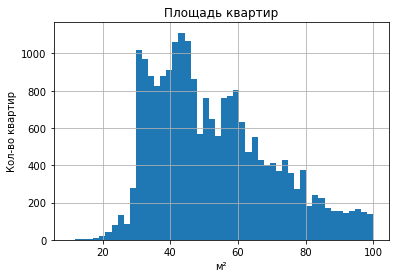

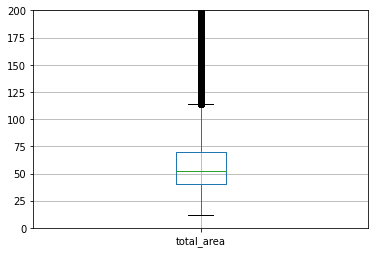

In [20]:
data.hist('total_area', bins= 50, range=(10, 100))
plt.title("Площадь квартир")
plt.xlabel("м²")
plt.ylabel("Кол-во квартир")
plt.show()

plt.ylim(0, 200)
data.boxplot(column='total_area')
plt.show()

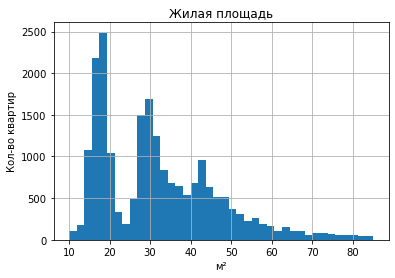

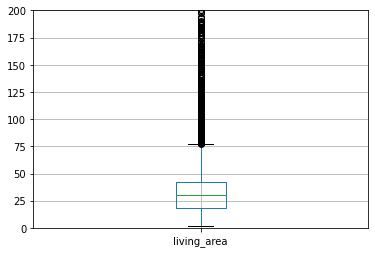

count    21626.000000
mean        34.349622
std         21.666366
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64

In [21]:
data.hist('living_area', bins= 40, range=(10, 85))
plt.title("Жилая площадь")
plt.xlabel("м²")
plt.ylabel("Кол-во квартир")
plt.show()

plt.ylim(0, 200)
data.boxplot(column='living_area')
plt.show()

data['living_area'].describe()



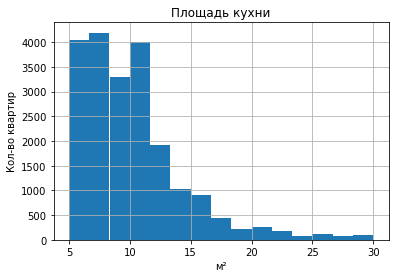

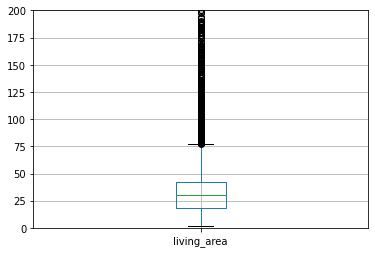

count    21626.000000
mean        34.349622
std         21.666366
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64

In [22]:
data.hist('kitchen_area', bins= 15, range=(5, 30))
plt.title("Площадь кухни")
plt.xlabel("м²")
plt.ylabel("Кол-во квартир")
plt.show()

plt.ylim(0, 200)
data.boxplot(column='living_area')
plt.show()

data['living_area'].describe()

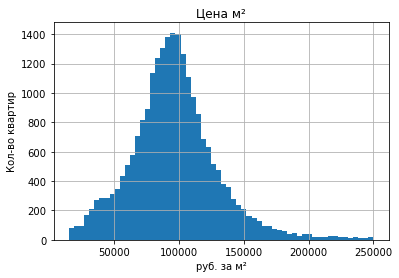

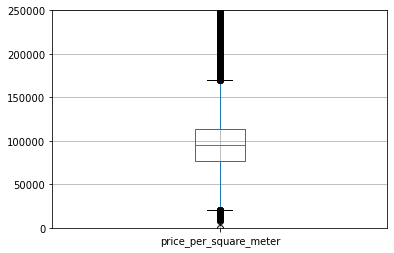

count      23485.00000
mean       99241.16628
std        49860.94000
min          111.00000
25%        76562.00000
50%        94965.00000
75%       114114.00000
max      1907500.00000
Name: price_per_square_meter, dtype: object

In [23]:
data.hist('price_per_square_meter', bins= 60, range=(15000, 250000))
plt.title("Цена м²")
plt.xlabel("руб. за м²")
plt.ylabel("Кол-во квартир")
plt.show()

plt.ylim(0, 250000)
data.boxplot(column='price_per_square_meter')
plt.show()

data['price_per_square_meter'].describe().apply("{0:.5f}".format)

1) Наибольшее число квартир выставляются на продажу с метражом от 25 до 100 метров. 
Встречаются обьясвления с аномально большим маленьким маленьким метражом, однако остальные параметры соответвуют их площади, нет оснований считать их вбросами.

2) Наимболее распространенный метраж жилой площади находится в районе 10 - 50 метров. 
Есть несколько вершин, вероятно связано с кол-вом комнат, каждый пик показывает увеличение числа комнат и далее идёт на спад. Чем больше комнат - тем меньше вершина.

3) Наимболее распространенный метраж кухонной площади находится в районе 5 - 15 метров. Кухни метражом 25+ метров встречаются крайне редко

4) Наимболее распространенная цена в районе 75000 - 120000 руб. Есть как слишком высокая цена ( вероятно элитная недвижимость), так и маленькая, отосительно среней/медианы (вероятно деревня/село)


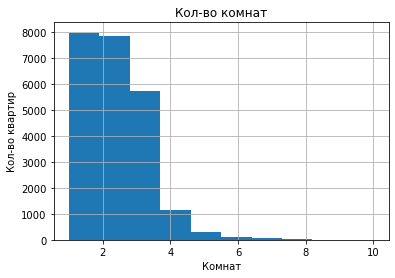

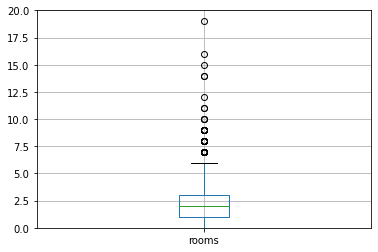

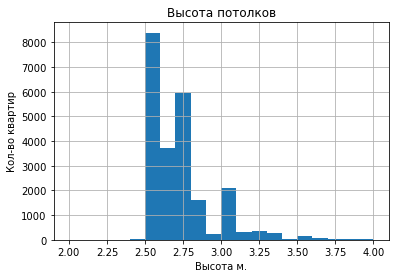

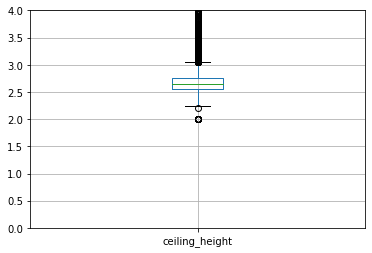

count    23485.000000
mean         2.704088
std          0.219809
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          4.000000
Name: ceiling_height, dtype: float64

In [24]:
data.hist('rooms', bins= 10, range=(1, 10))
plt.title("Кол-во комнат")
plt.xlabel("Комнат")
plt.ylabel("Кол-во квартир")
plt.show()

plt.ylim(0, 20)
data.boxplot(column='rooms')
plt.show()

data['rooms'].describe()

data.hist('ceiling_height', bins= 20, range=(2, 4))
plt.title("Высота потолков")
plt.xlabel("Высота м.")
plt.ylabel("Кол-во квартир")
plt.show()

plt.ylim(0, 4)
data.boxplot(column='ceiling_height')
plt.show()

data['ceiling_height'].describe()




1) Наиболее распространенное кол-во комнат в обьявлении 1-3, немного реже 5, далее идёт резкий спад

2) Чаще всего встречается 2.5- 3м. высота потолков

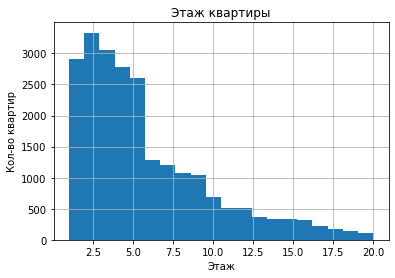

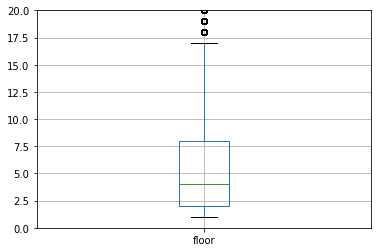

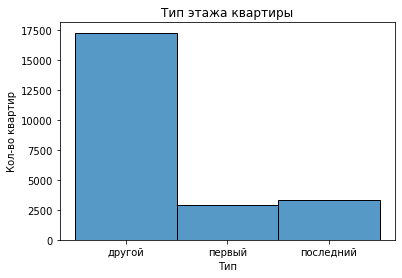

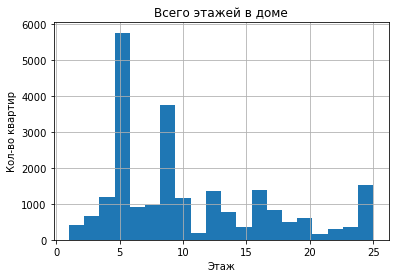

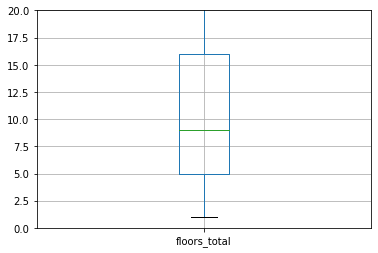

count    23485.000000
mean        10.684309
std          6.588255
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [25]:
data.hist('floor', bins= 20, range=(1, 20))
plt.title("Этаж квартиры")
plt.xlabel("Этаж")
plt.ylabel("Кол-во квартир")
plt.show()

plt.ylim(0, 20)
data.boxplot(column='floor')
plt.show()

data['floor'].describe()

sns.histplot(data=data, x='floor_type')
plt.title("Тип этажа квартиры")
plt.xlabel("Тип")
plt.ylabel("Кол-во квартир")
plt.show()

data.hist('floors_total', bins= 20, range=(1, 25))
plt.title("Всего этажей в доме")
plt.xlabel("Этаж")
plt.ylabel("Кол-во квартир")
plt.show()

plt.ylim(0, 20)
data.boxplot(column='floors_total')
plt.show()

data['floors_total'].describe()


1) Наоболее распространенные этажи в обьявления 1-5

2) Первый и последний этажи квартиры встречаются приблизительно в равном кол-ве обьявлений

3) Самые распространенные дома с 5, 9 и 25 этажами

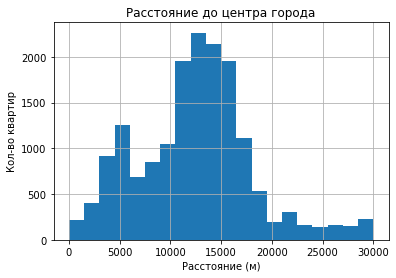

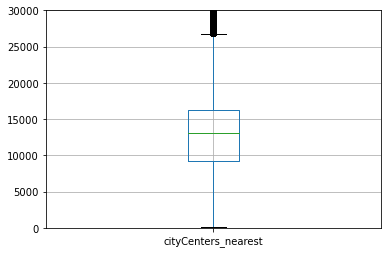

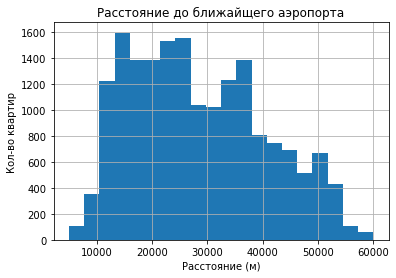

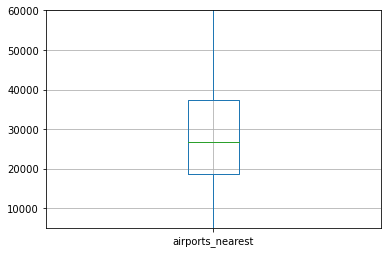

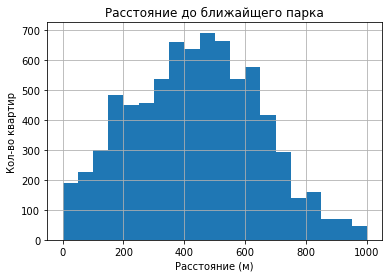

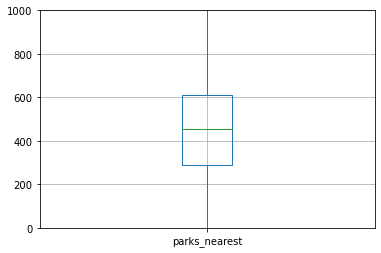

count    7992.000000
mean      490.704204
std       341.929560
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [26]:
data.hist('cityCenters_nearest', bins= 20, range=(0, 30000))
plt.title("Расстояние до центра города")
plt.xlabel("Расстояние (м)")
plt.ylabel("Кол-во квартир")
plt.show()

plt.ylim(0, 30000)
data.boxplot(column='cityCenters_nearest')
plt.show()

data['cityCenters_nearest'].describe()

data.hist('airports_nearest', bins= 20, range=(5000, 60000))
plt.title("Расстояние до ближайщего аэропорта")
plt.xlabel("Расстояние (м)")
plt.ylabel("Кол-во квартир")
plt.show()

plt.ylim(5000, 60000)
data.boxplot(column='airports_nearest')
plt.show()

data['airports_nearest'].describe()


data.hist('parks_nearest', bins= 20, range=(0, 1000))
plt.title("Расстояние до ближайщего парка")
plt.xlabel("Расстояние (м)")
plt.ylabel("Кол-во квартир")
plt.show()

plt.ylim(0, 1000)
data.boxplot(column='parks_nearest')
plt.show()

data['parks_nearest'].describe()


1) Наиболее распространенное расстояние в районе 5000 и 10000 - 17000 м.

2) Наиболее распространенное расстояние в районе 10000 - 40000 м.

3) Наиболее распространенное расстояние в районе 150 - 700 м.

<a name="покупают"></a>
**Посмотрим когда чаще всего покупают квартиры**

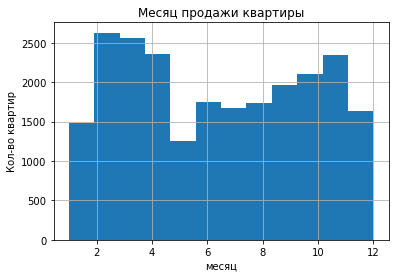

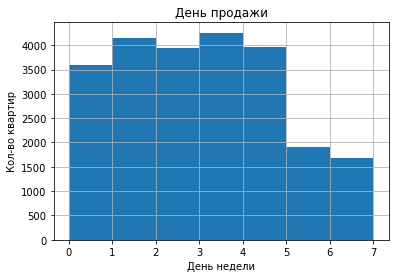

In [27]:
data.hist('month', bins= 12, range=(1, 12))
plt.title("Месяц продажи квартиры")
plt.xlabel("месяц")
plt.ylabel("Кол-во квартир")
plt.show()


data.hist('weekday', bins= 7, range=(0, 7))
plt.title("День продажи")
plt.xlabel("День недели")
plt.ylabel("Кол-во квартир")
plt.show()

1) Чаще всего обьявления о продаже размещают в феврале, марте и апрелеле, наименьшее количество обьявления размещают в мае.

2) В будние дни кол-во размещенных обьявлений примерно одинаковое, хотя в понедельник наблюдается небольшой спад. Виден резкий спад в выходные дни.

<a name="продавались"></a>
**Посмотрим как быстро продавались квартиры**

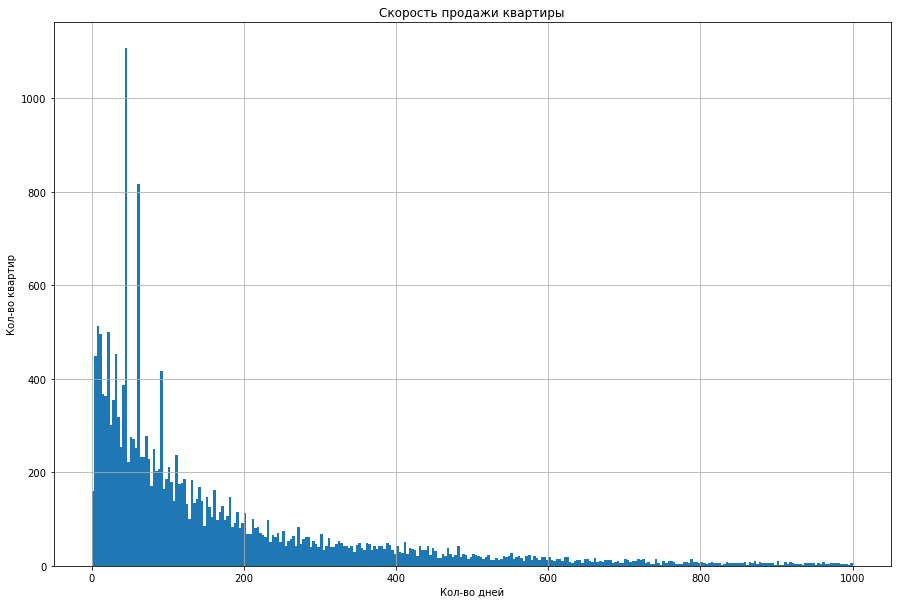

In [28]:
data.hist('days_exposition', bins= 300, range=(0, 1000), figsize=(15, 10))
plt.title("Скорость продажи квартиры")
plt.xlabel("Кол-во дней")
plt.ylabel("Кол-во квартир")
plt.show()







есть вбросы, посмотрим конкретнее

In [29]:
data['days_exposition'].value_counts().sort_values(ascending=False).head(10)

45.0    879
60.0    537
7.0     233
30.0    207
90.0    200
4.0     174
3.0     157
5.0     152
14.0    145
9.0     142
Name: days_exposition, dtype: int64

Можем сделать вывод:
- Среднее время продажи квартиры 180 дней;
- Медиана 95 дней.
- быстрая продажа 45 дней;
- медленная продажа 231 день.


На гистограмме видно, что есть выбивающиеся значения, если расположить их в порядке возрастания, получим  7, 30, 45, 60, 90. Учитывая ровное кол-во дней, можно предположить, что обьявления платные, по истеченни времени - они закрываются или обьявления закрываются по истечении определенного времени в случае бездействия владельца квартиры. 



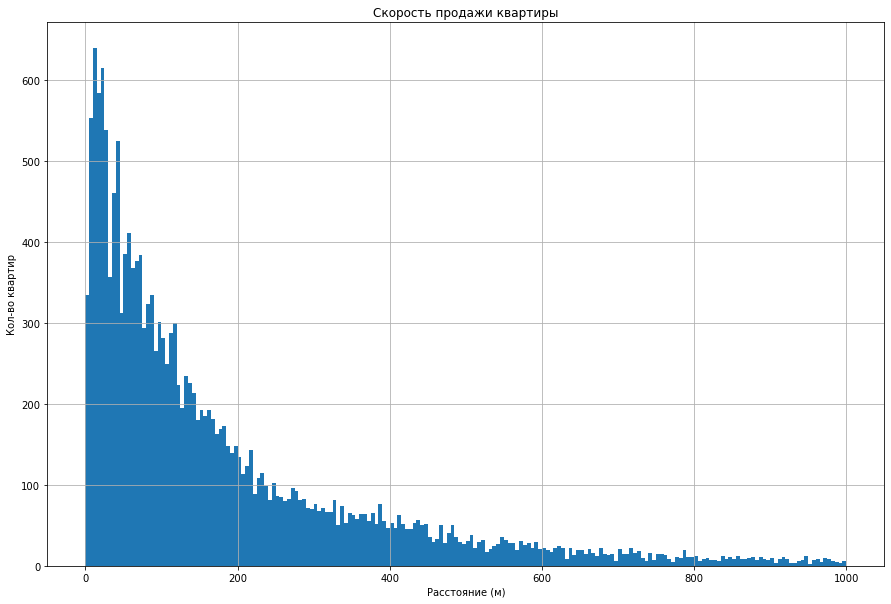

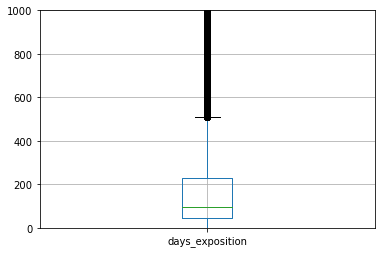

count    18272.000000
mean       195.476029
std        226.549675
min          1.000000
25%         44.000000
50%        113.000000
75%        258.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [30]:
data2 = data

data2 = data2.query('days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition !=  60 and days_exposition != 90 and days_exposition != 10000')


data2.hist('days_exposition', bins= 200, range=(0, 1000), figsize=(15, 10))
plt.title("Скорость продажи квартиры")
plt.xlabel("Расстояние (м)")
plt.ylabel("Кол-во квартир")
plt.show()

data2['days_exposition'].value_counts().sort_values(ascending=False).head(10)

plt.ylim(0, 1000)
data.boxplot(column='days_exposition')
plt.show()

data2['days_exposition'].describe()



1. Среднее время продажи квартиры составляет 195 дней.
2. Медианное время составляет 113 дней.
3. Быстрой продажей можно считать квартиру проданную за 44 дня и меньше.
4. Необычно долгим временем продажи можно считать квартиру проданную за 500+ дней.



<a name="факторы"></a>
**Посмотрим факторы влияющие на стоимость объекта**

Посмотрим зависимость цены от площади обьекта

Коэфициэнт Пирсона: 0.65


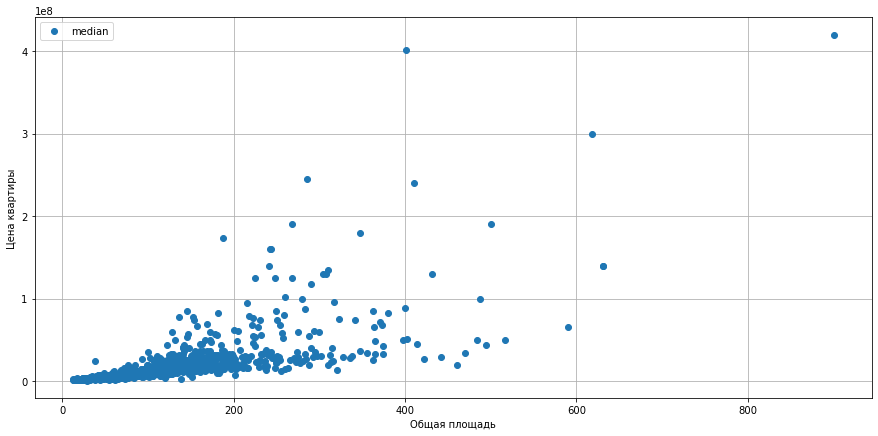

In [31]:
price_per_square_meter = data.pivot_table(
    index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
price_per_square_meter.columns = ['mean', 'count', 'median']
price_per_square_meter.sort_values(by='median', ascending = False)

price_per_square_meter.plot(
    y='median', style='o', grid=True, figsize=(15,7))
plt.xlabel("Общая площадь")
plt.ylabel("Цена квартиры")

print('Коэфициэнт Пирсона:' , data['total_area'].corr(data['last_price']).round(2))

Коэфициэнту коррелиции Пирсона равен 0.65. Делаем вывод, что между ценой квартиры и общей площадью, продаваемой квартиры, заметная сила корреляции. Чем больше площадь -> тем больше цена квартиры

Посмотрим зависимость цены от жилой площади 

Коэфициэнт Пирсона: 0.56


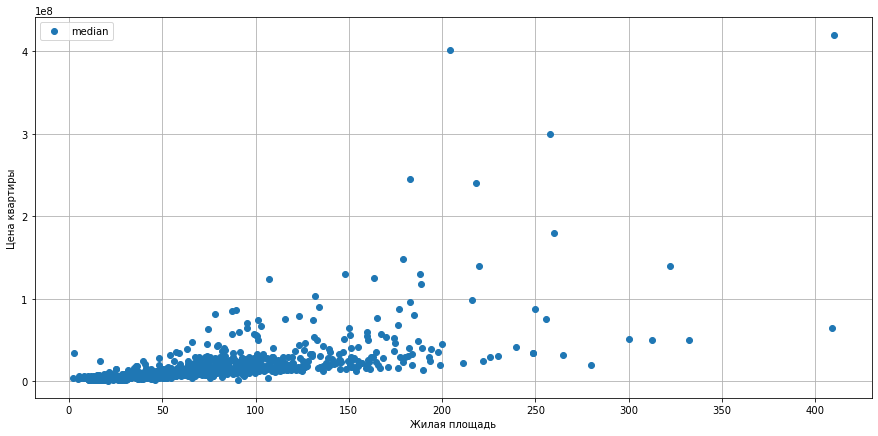

In [32]:
living_area = data.pivot_table(
    index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
living_area.columns = ['mean', 'count', 'median']
living_area.sort_values(by='median', ascending = False)

living_area.plot(
    y='median', style='o', grid=True, figsize=(15,7))
plt.xlabel("Жилая площадь")
plt.ylabel("Цена квартиры")

print('Коэфициэнт Пирсона:' , data['living_area'].corr(data['last_price']).round(2))

Ситуация схожа с общей площадью, коэфициэнт Пирсона: 0.56. Корреляция ниже чем у общей площади, но также можем утвержать - чем больше жилая площадь -> тем больше цена квартиры

Посмотрим зависимость цены от кухонной площади 

Коэфициэнт Пирсона: 0.52


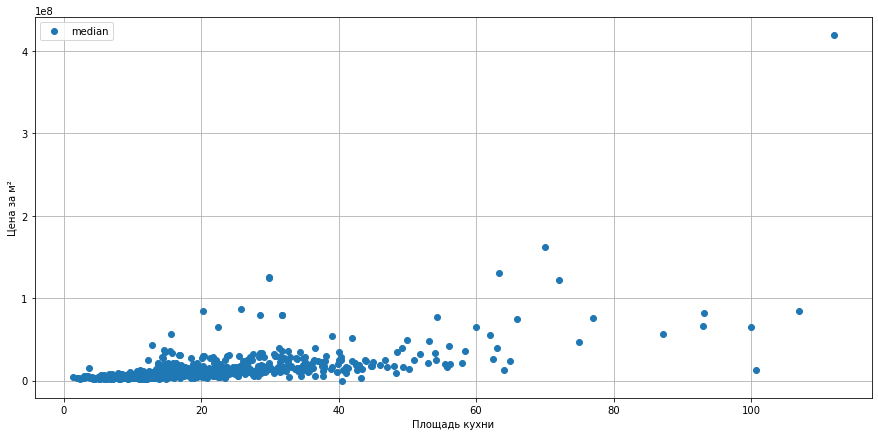

In [33]:
kitchen_area = data.pivot_table(
    index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
kitchen_area.columns = ['mean', 'count', 'median']
kitchen_area.sort_values(by='median', ascending = False)

kitchen_area.plot(
    y='median', style='o', grid=True, figsize=(15,7))
plt.xlabel("Площадь кухни")
plt.ylabel("Цена за м²")

print('Коэфициэнт Пирсона:' , data['kitchen_area'].corr(data['last_price']).round(2))

Коэфициэнт Пирсона: 0.52, наименьшей при сравнении влияния площадей на цену, однако сила корреляции остается заметной.

Посмотрим зависимость цены от кол-ва комнат

Коэфициэнт Пирсона: 0.36


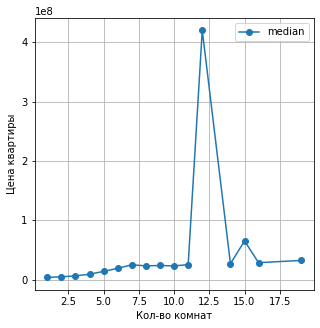

In [34]:
rooms = data.query('rooms != 0').pivot_table(index='rooms', values='last_price', aggfunc = ['mean', 'count', 'median'])
rooms.columns = ['mean', 'count', 'median']
rooms.plot(grid=True, y='median', style='o-', figsize=(5, 5))
plt.xlabel("Кол-во комнат")
plt.ylabel("Цена квартиры")

print('Коэфициэнт Пирсона:' , data.query('rooms != 0')['rooms'].corr(data['last_price']).round(2))

В случае с влиянием кол-ва комнат на цену квартиры, коэфициэнт корреляции Пирсона умеренный: 0.36.

На графике мы видим, что до 7 комнат включительно - цена только растет, посмотрим в срезе.

Коэфициэнт Пирсона: 0.37
Коэфициэнт Пирсона: 0.06


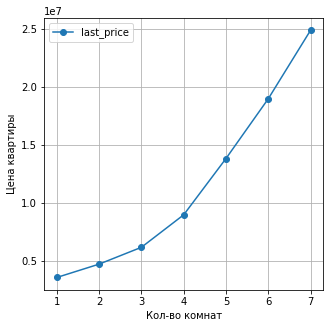

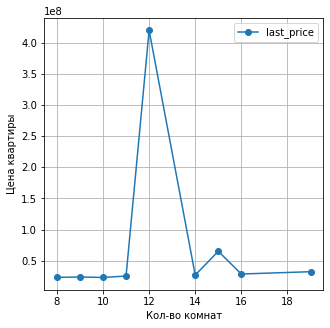

In [35]:
#сделаем 2 выборки, квартиры до 7 комнат и квартиры 7+ комнат.

data.query('rooms != 0 and rooms <= 7').pivot_table(
    index='rooms', values='last_price', aggfunc ='median').plot(
    grid=True, style='o-', figsize=(5, 5))

plt.xlabel("Кол-во комнат")
plt.ylabel("Цена квартиры")
print('Коэфициэнт Пирсона:' , data.query('rooms != 0 and rooms < 7')['rooms'].corr(data['last_price']).round(2))

data.query('rooms != 0 and rooms > 7').pivot_table(
    index='rooms', values='last_price', aggfunc ='median').plot(
    grid=True, style='o-', figsize=(5, 5))

plt.xlabel("Кол-во комнат")
plt.ylabel("Цена квартиры")

print('Коэфициэнт Пирсона:' , data.query('rooms != 0 and rooms > 7')['rooms'].corr(data['last_price']).round(2))

Можно сделать вывод, что кол-во комнат влияет на цену только до определенного момента. В квартирах с количеством комнат от 7 и больше нет зависимости цены квартиры и количества комнат.

Посмотрим влияние этажа на цену квартиры

,count,median,mean
floor_type,,,
другой,17279,4830000,6656110
первый,2903,3900000,4800835
последний,3303,4300000,7123013


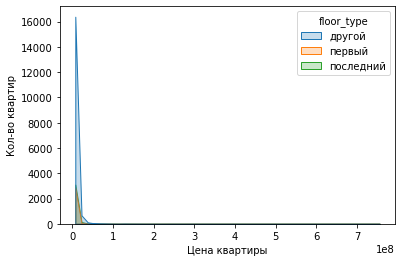

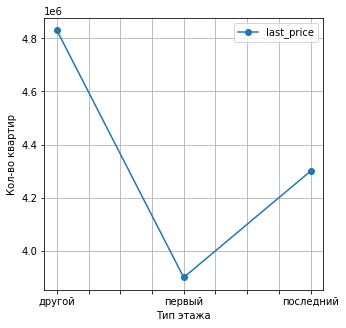

In [36]:
sns.histplot(data=data, x="last_price", hue="floor_type", bins=50, element="poly")

plt.xlabel("Цена квартиры")
plt.ylabel("Кол-во квартир")


data.pivot_table(
    index='floor_type', values='last_price', aggfunc = 'median').plot(
    grid=True, style='o-', figsize=(5, 5))

plt.xlabel("Тип этажа")
plt.ylabel("Кол-во квартир")

floor_type = data.pivot_table(
    index='floor_type', values='last_price', aggfunc = ['count', 'median', 'mean'])
floor_type.columns = ['count', 'median', 'mean']
floor_type['mean'] = floor_type['mean'].astype('int64')

floor_type

Наименьшея цена у квартир расположенных на 1-м этаже, следом идут квартиры, рассполоденные на последнем этажа.

Наибольшая цена у квартир расположенных не на 1-м этаже и не на последнем.

Посмотрим как влияет дата размещения на цену

         count   median
weekday                
6         1679  4500000
4         3966  4550000
5         1915  4550000
0         3586  4650000
3         4258  4650000
1         4146  4700000
2         3935  4700000


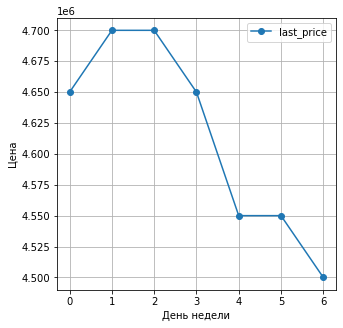

In [37]:
data.pivot_table(
    index='weekday', values='last_price', aggfunc = 'median').plot(
    grid=True, style='o-', figsize=(5, 5))

weekday = data.pivot_table(index='weekday', values='last_price', aggfunc = ['count', 'median'])
weekday.columns = ['count', 'median']

plt.xlabel("День недели")
plt.ylabel("Цена")

print(weekday.sort_values('median'))

В среду и вторник владельцы квартиры устанавливают наибольшую цену.
В воскресение устаналивается наименьшая цена.

       count   median
month                
6       1744  4400000
5       1258  4500000
8       1733  4570000
10      2101  4570000
1       1484  4600000
7       1676  4600000
2       2628  4650000
3       2562  4650000
12      1631  4690000
11      2350  4699500
9       1966  4700000
4       2352  4800000


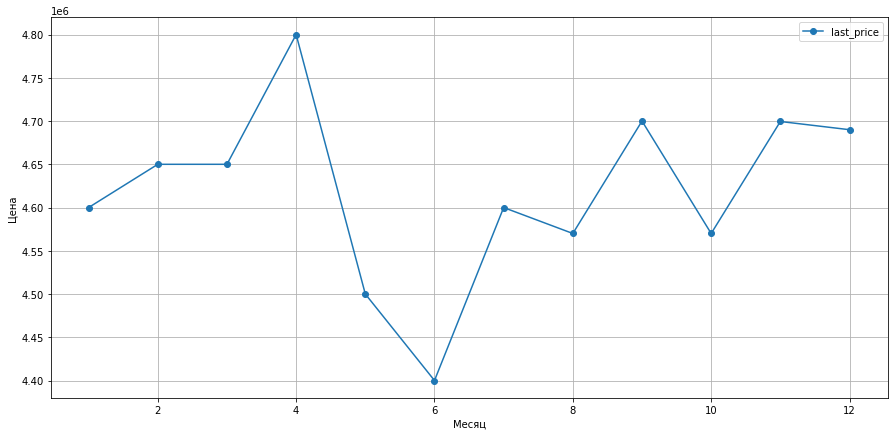

In [38]:
data.pivot_table(
    index='month', values='last_price', aggfunc = 'median').plot(
    grid=True, style='o-', figsize=(15, 7))

month = data.pivot_table(index='month', values='last_price', aggfunc = ['count', 'median'])
month.columns = ['count', 'median']

plt.xlabel("Месяц")
plt.ylabel("Цена")

print(month.sort_values('median'))

В апреле и сентября владельцы квартир устанавливают наибольшую цену.
В мае и июне устаналивается наименьшая цена.

      count   median
year                
2014    135  7580000
2015   1159  5300000
2019   2863  5050000
2018   8458  4550000
2016   2739  4500000
2017   8131  4500000


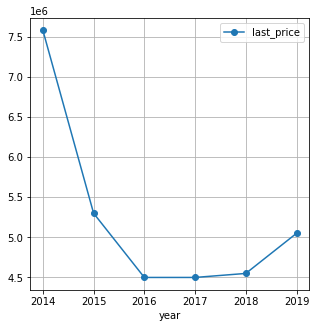

In [39]:
data.pivot_table(
    index='year', values='last_price', aggfunc = 'median').plot(
    grid=True, style='o-', figsize=(5, 5))

year = data.pivot_table(index='year', values='last_price', aggfunc = ['count', 'median'])
year.columns = ['count', 'median']

print(year.sort_values('median', ascending=False))

In [40]:
year2 = data.pivot_table(
    index='year', values=['total_area', 'price_per_square_meter', 'last_price'], aggfunc = ['count', 'mean', 'median'])
year2.columns = [
    'число_квартир', 'count1', 'count2', 
    'средняя_цена', 'средняя_цена_за_м' ,'средняя_площадь', 
    'медиана_цены', 'медиана_цены за м', 'медиана_площади']



year2.loc[:, ['средняя_цена', 'средняя_цена_за_м']] = year2.loc[:, ['средняя_цена', 'средняя_цена_за_м']].astype('int64')

year2['средняя_площадь'] = year2['средняя_площадь'].round(1)

print('Коэфициэнт корреляции Пирсона(год/цена за м²):' , data.query('year != 2014')['year'].corr(data['last_price']).round(2))
print('Коэфициэнт Пирсона(год/общая цена):' , data.query('year != 2014')['year'].corr(data['price_per_square_meter']).round(2))
print('Коэфициэнт Пирсона(год/общая площадь):' , data['year'].corr(data['total_area']).round(2))

year2.drop(columns=['count1', 'count2'])

Коэфициэнт корреляции Пирсона(год/цена за м²): -0.03
Коэфициэнт Пирсона(год/общая цена): 0.02
Коэфициэнт Пирсона(год/общая площадь): -0.08


,число_квартир,средняя_цена,средняя_цена_за_м,средняя_площадь,медиана_цены,медиана_цены за м,медиана_площади
year,,,,,,,
2014,135,11817315,124085,84.8,7580000,106803,76.1
2015,1159,8415037,104434,70.6,5300000,93333,60.0
2016,2739,6814612,98186,62.0,4500000,91666,53.0
2017,8131,6520927,97370,60.5,4500000,92500,52.0
2018,8458,5915059,97606,57.6,4550000,95652,50.5
2019,2863,6779685,107118,59.4,5050000,103305,52.0


- Если брать соотнощение общая цена/цена за м²/площадь - 2019 год был лучшим для продажи кваритры, 2017 худшим;
- Есть слабая динамика от года к году к снижению общей площади квартиры и увеличению цены за м², что в целом, можно назвать положительным фактором влиящим на цену квартиры для владельцев.

<a name="Найдем"></a>
**Найдем среднию цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [41]:
locality_name = data.pivot_table(
    index='locality_name', values='price_per_square_meter', aggfunc=['count', 'median', 'mean'])
locality_name.columns = ['count', 'median', 'mean']

locality_name = locality_name.query('count > 235').sort_values('median', ascending=False)

locality_name

,count,median,mean
locality_name,,,
Санкт-Петербург,15589,104750.0,114642.303612
Пушкин,368,99993.5,103057.915761
Кудрово,470,95555.0,95260.393617
Парголово,327,91642.0,90175.489297
Мурино,584,86249.5,86017.652397
Шушары,439,76829.0,78550.883827
Колпино,338,74723.5,75424.150888
Гатчина,306,67860.0,68757.225490
Всеволожск,397,65789.0,68605.105793


Самыми дорогими городами для покупки вартиры являются Санкт-Петербург и Пушкин.

Самыми дешевыми городами для покупки квартиры являются Всеволожск и Выборг.

<a name="расстояния"></a>
**Посмотрим влияние расстояния до центра горада на стоимость квартиры**

Коэфициэнт Пирсона: -0.31


,mean
cityCenters_nearest_km,
0,188192.464286
1,164809.289362
2,145185.382838
3,129598.104449
4,136738.359865
5,146226.944809
6,151857.167024
7,141399.287469
8,119858.246988


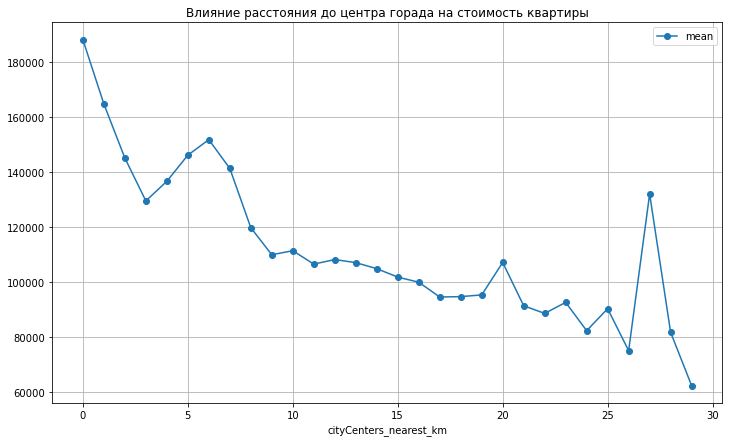

In [42]:
df = data.query('locality_name == "Санкт-Петербург"')

#Кол-во пропусков 60, на исследование не повлияет - дропаем.
df['cityCenters_nearest_km'].isna().sum()

df = df.dropna(subset=['cityCenters_nearest_km'])

df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int64')

df['cityCenters_nearest_km'].value_counts().sort_values(ascending=False)

df2 = df.pivot_table(
    index='cityCenters_nearest_km', values ='price_per_square_meter', aggfunc=['mean'])

print('Коэфициэнт Пирсона:' , df['cityCenters_nearest_km'].corr(df['price_per_square_meter']).round(2))

df2.columns = ['mean']

df2.plot(grid=True, style='o-', figsize=(12, 7),title = 'Влияние расстояния до центра горада на стоимость квартиры')

df2.head(20)




Согласно графику, чем дальше удаление от центра - тем выше цена кв. м.. 
Также есть всплеск цены с 4 по 7 км. включительно.

C 9 км. цена за кв. м. становится средней по городу.

<a name="Общий_вывод"></a>
# 4. Общий вывод

***Общее описание продаваемых квартир***

- В основном на продажу выставляются квартиры метражом от 25 до 100 м². Наиболее распространенный метраж, продаваемых квартир, находится в районе 52 м².;
- Наимболее распространенная цена в районе 50000 - 130000 руб.;
- Самые популярные 1-3-х комнатные квартиры;
- Самые распространенная этажность домов 5 и 9 этажей.


**Время продажи квартиры:**
Чаще всего квартира продается в районе 113 дней
Быстрой продажей можно считать квартиру проданную за 44 дня и меньше.
Необычно долгим временем продажи можно считать квартиру проданную за 500+ дней.


**Факторы влияющие на стоимость квартиры**
- Сильнее всего на стоиимость квартиры влияет общий метраж, в меньшей степени, но заметно, на стоимость влиют метраж жилой и кухонной площади;
- Количество комнат также влияет на стоимость квартиры, но до определенного момента, после 7-й комнаты включительно, влияние сходит на нет;
- Есть слабая динамика от года к году к снижению общей площади квартиры и увеличению цены за м², что в целом, можно назвать положительным фактором влиящим на цену квартиры для ее владельцев;
- Квартиры расположенные на 1-м и последнем этажах стоят дешевле;
- В апреле и сентября цены на квартиры выше, в мае и июне устаналивается наименьшая цена;
- В среду и вторник на квартиру устанавливают наибольшую цену, в воскресение устаналивается наименьшая цена;
- Наибольшая цена за м² наблюдается в Санкт-Петербурге 104750.0 руб., самые дешевые квартиры в Выборге 58133.0 руб.


***Влияние расстояние до центра горада на стоимость квартиры:***
На примере Санкт-Петербурга умеренная отрицательная корреляция, чем дальше квартира от центра города, тем ниже цена её цена.